<>:94: SyntaxWarning: invalid escape sequence '\s'
<>:99: SyntaxWarning: invalid escape sequence '\s'
<>:94: SyntaxWarning: invalid escape sequence '\s'
<>:99: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Sakthi\AppData\Local\Temp\ipykernel_23424\1058968251.py:94: SyntaxWarning: invalid escape sequence '\s'
  f'$\sigma = {sigma*1e3:.2f}mV$', fontsize=10, verticalalignment='bottom',
C:\Users\Sakthi\AppData\Local\Temp\ipykernel_23424\1058968251.py:99: SyntaxWarning: invalid escape sequence '\s'
  f'$\sigma = {sigma*1e3:.2f}mV$', fontsize=10, verticalalignment='bottom',



xelatex


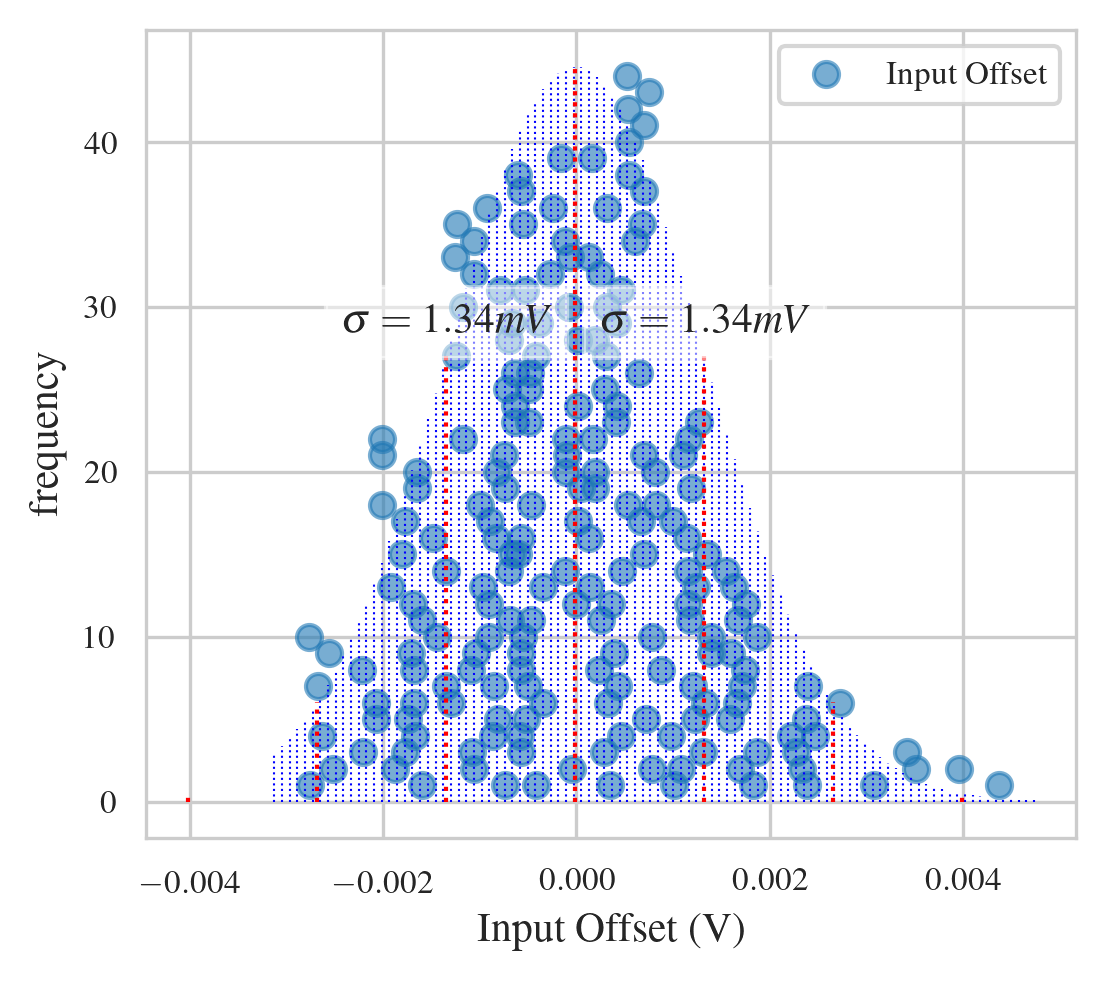

In [14]:

## Script to create a plot with IEEE style and save it as a high-resolution PNG file

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib as mpl
import csv
from scipy.stats import norm
print(mpl.rcParams['text.latex.preamble'])
print(mpl.rcParams['pgf.texsystem'])

# Define a function to set the style for IEEE conference
def set_ieee_style():
    sns.set_style("whitegrid")
    plt.rcParams.update({
        'font.size': 10,
        'axes.labelsize': 10,
        'axes.titlesize': 10,
        'xtick.labelsize': 8,
        'ytick.labelsize': 8,
        'legend.fontsize': 8,
        'figure.figsize': (4, 3.5),
        'figure.dpi': 300,
        'savefig.dpi': 300,
        'text.usetex': True,
        'font.family': 'serif',
        'font.serif': ['Times'],
    })


## Monte carlo simulation plot for offset

# Apply IEEE style
set_ieee_style()

# Read data from CSV file
monte_carlo_data = []
with open('Offset_comparator.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        monte_carlo_data.append([float(value) for value in row])

# Convert to numpy array for easier manipulation
monte_carlo_data = np.array(monte_carlo_data)

# Extract x and y values
x_values = monte_carlo_data[:, 0]
y_values = monte_carlo_data[:, 1]

# Create the plot
fig, ax = plt.subplots()

ax.scatter(x_values, y_values, label='Input Offset', alpha=0.6)

# Add labels and title
ax.set_xlabel('Input Offset (V)')
ax.set_ylabel('frequency')
#ax.set_title('Monte Carlo Simulation Results')
ax.legend()

# Fit a normal distribution to the data
(mu, sigma) = norm.fit(x_values)

# Compute the maximum y value
max_y = np.max(y_values)

# Compute the average y value
avg_y = np.mean(y_values)

# Compute the scaling factor
#scaling_factor = max_y / avg_y
scaling_factor = 6.7

# Plot the PDF of the fitted normal distribution
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
# Draw a vertical line between the p plot and the x-axis
ax.vlines(x, 0, p/scaling_factor, colors='b', linestyles='dotted', linewidth=0.5)

# Add a vertical red line at the mean
ax.vlines(mu, 0, norm.pdf(mu, mu, sigma) / scaling_factor, colors='r', linestyles='dotted', linewidth=1)

# Add vertical lines at multiple sigma intervals
for i in range(1, 4):  # Adding lines for 1, 2, and 3 sigma intervals
    ax.vlines(mu + i * sigma, 0, norm.pdf(mu + i * sigma, mu, sigma) / scaling_factor, colors='r', linestyles='dotted', linewidth=1)
    ax.vlines(mu - i * sigma, 0, norm.pdf(mu - i * sigma, mu, sigma) / scaling_factor, colors='r', linestyles='dotted', linewidth=1)
# Add sigma value to the plot near the plot
# Add sigma value to the plot near the plot
# Add sigma value to the plot near the plot
ax.text(mu + sigma, norm.pdf(mu + sigma, mu, sigma) / scaling_factor + 0.02 * max_y, 
    f'$\sigma = {sigma*1e3:.2f}mV$', fontsize=10, verticalalignment='bottom', 
    horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

# Add sigma value to the plot on the other side of the mean
ax.text(mu - sigma, norm.pdf(mu - sigma, mu, sigma) / scaling_factor + 0.02 * max_y, 
    f'$\sigma = {sigma*1e3:.2f}mV$', fontsize=10, verticalalignment='bottom', 
    horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

# Add legend
ax.legend()

# Save the plot as a high-resolution PNG file
plt.savefig('monte_carlo_offset.png', bbox_inches='tight')

# Show the plot
plt.show()
